# House Prices Regression

## Imports

In [64]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import random
import json

In [32]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Key

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [15]:
corr = data.corr()
corr.shape

(14, 14)

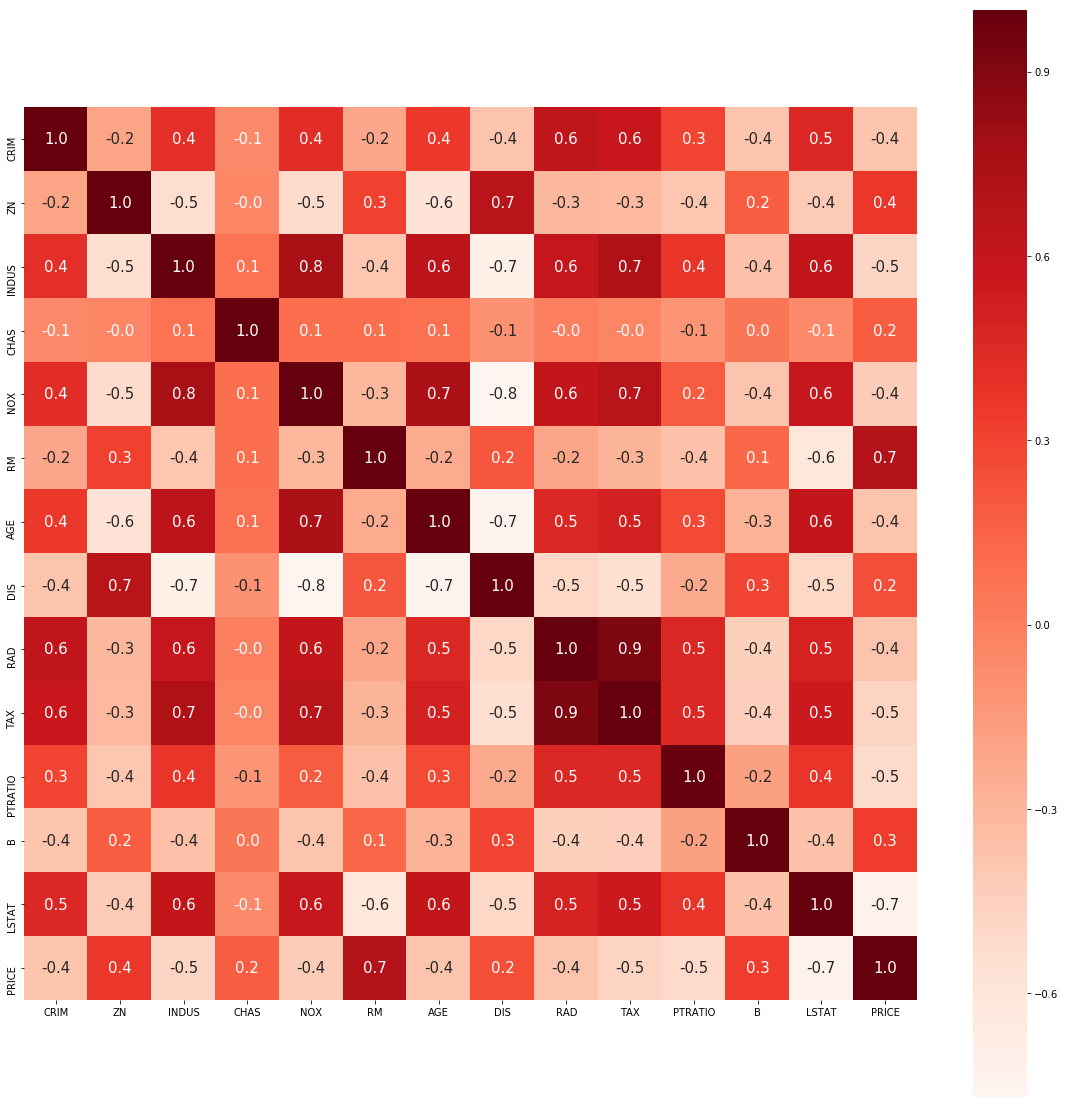

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True,
            fmt='.1f', annot=True, 
            annot_kws={'size':15}, cmap='Reds')

In [18]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [19]:
#SPlitting into traing test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [27]:
train_dataset = pd.concat((X_train, y_train), axis = 1)
test_dataset = pd.concat((X_test, y_test), axis = 1)

In [29]:
# os.mkdir("datasets/")

In [30]:
# train_dataset.to_csv("datasets/train.csv", index = False)
# test_dataset.to_csv("datasets/test.csv", index = False)

In [33]:
#Using XgBoost for our base model

reg = XGBRegressor()

In [34]:
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

## Train Data

In [35]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [36]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999980912169968
Adjusted R^2: 0.9999980182341173
MAE: 0.008653071775274813
MSE: 0.00014367568030020436
RMSE: 0.011986479061851497


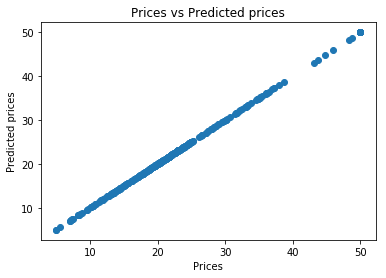

In [37]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

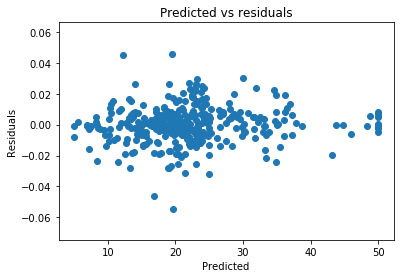

In [38]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## Test data

In [39]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)


In [40]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8579952058455785
Adjusted R^2: 0.8446179426281331
MAE: 2.5309582816927056
MSE: 14.828150869974769
RMSE: 3.8507338092855457


<Container object of 13 artists>

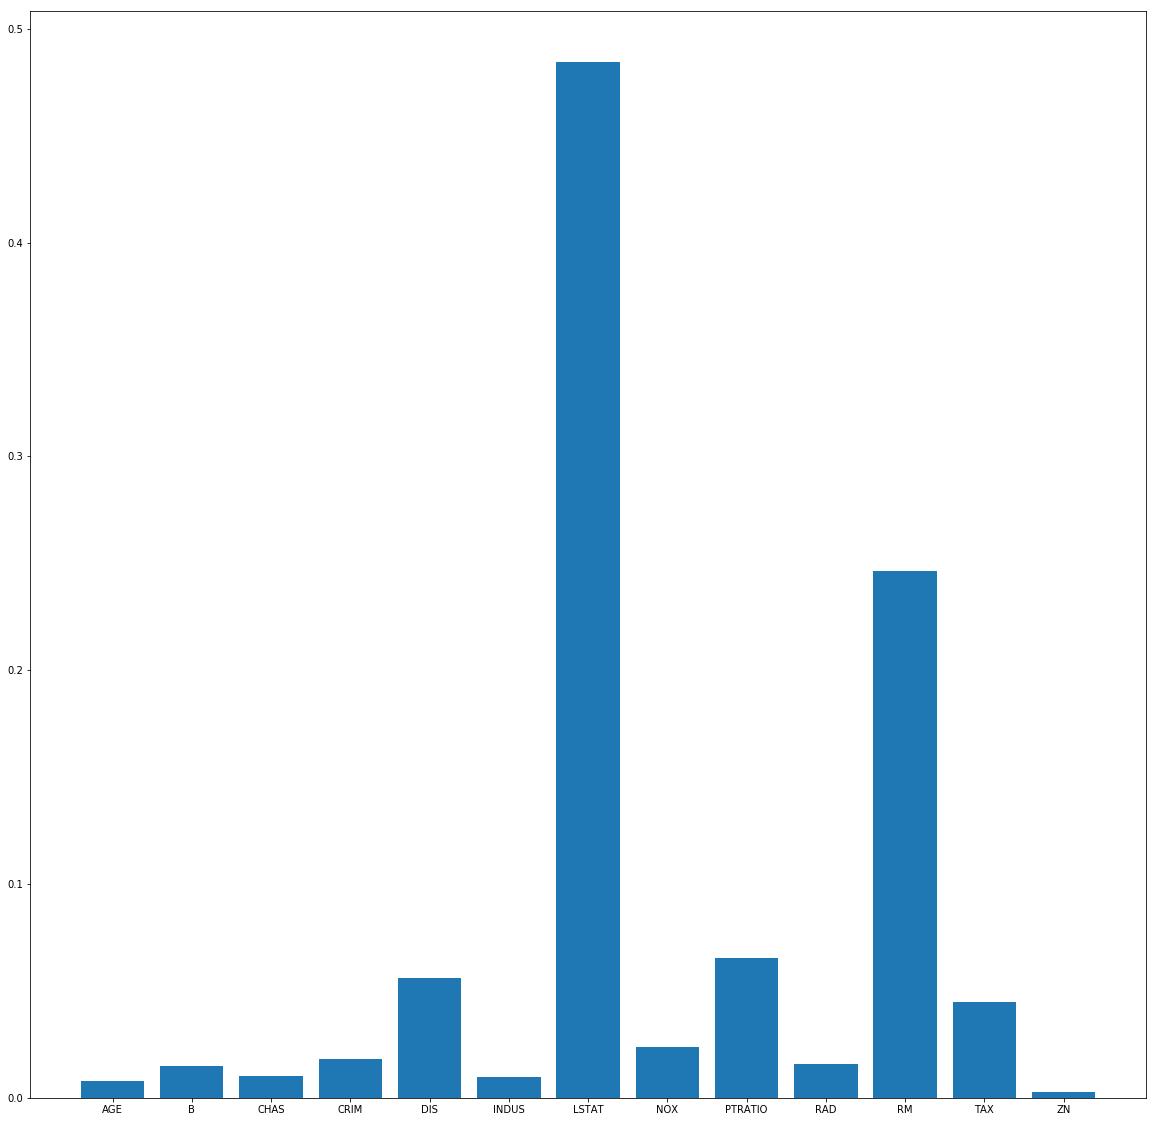

In [55]:
# Importances
plt.figure(figsize=(20,20))
plt.bar(x = X_train.columns, height = reg.feature_importances_)

## Saving the Model

In [42]:
os.mkdir('models/')

In [43]:
reg.save_model('models/xgb_regressor.json')

In [49]:
with open('models/xgb_regressor_snapshot.bin', 'wb') as fd:
    pickle.dump(reg, fd)

## Testing the predictor

In [50]:
#Loading the model
with open('models/xgb_regressor_snapshot.bin', 'rb') as file:
    xgb_model = pickle.load(file)

## Generating test JSONs

In [73]:
test_dataset = test_dataset.reset_index(drop = True)

In [71]:
test_dataset = test_dataset.drop(columns=['index'])

In [74]:
test_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
1,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8
2,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4
3,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98,19.3
4,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
5,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72,24.2
6,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
7,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24.0,666.0,20.2,396.90,16.29,19.9
8,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5
9,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0


In [75]:
dict(test_dataset.iloc[10])

{'AGE': 28.1,
 'B': 387.97,
 'CHAS': 0.0,
 'CRIM': 0.03049,
 'DIS': 6.4654,
 'INDUS': 3.78,
 'LSTAT': 4.61,
 'NOX': 0.484,
 'PRICE': 31.2,
 'PTRATIO': 17.6,
 'RAD': 5.0,
 'RM': 6.874,
 'TAX': 370.0,
 'ZN': 55.0}

In [63]:
os.mkdir('test')

In [110]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
70,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
470,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24.0,666.0,20.2,396.90,16.29
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12


In [76]:
for idx in range(10):
    index = random.randint(0, 150)
    sample = dict(test_dataset.iloc[index])
    with open(f'test/data_sample_{idx}.json', 'w') as file:
        json.dump(sample, file)

## Test Local Prediction

In [120]:
import requests

In [167]:
with open('test/data_sample_0.json', 'r') as file:
    data = json.load(file)

In [168]:
res = requests.post(url= 'http://0.0.0.0:5000/predict',
               json = data)

In [169]:
res.json()

{'PRICE': 15.38182258605957}